In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [6]:
df.drop('CustomerID', axis=1, inplace=True)

In [7]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [8]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [19]:
from sklearn.cluster import KMeans
wcss = []
k_range = range(1,11)
for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(df)
    print(labels)
    wcss.append(kmeans.inertia_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 0 2 2 2 0 2 0 2 0 2 0 2 0 2 2 2 0 2 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 0 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0

C:\Users\Gaurav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Gaurav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Gaurav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Gaurav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

In [20]:
wcss

[309536.04000000004,
 221722.85307017548,
 159388.66524671236,
 104929.95744168112,
 97619.22909289354,
 68324.8224330509,
 51576.313853505824,
 44425.78540669857,
 42232.49791544792,
 38598.06827906393]

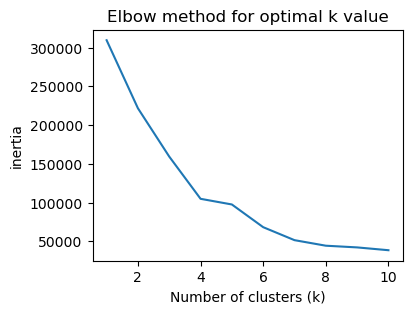

In [21]:
plt.figure(figsize=(4,3))
plt.plot(k_range, wcss)
plt.xlabel('Number of clusters (k)')
plt.ylabel('inertia')
plt.title('Elbow method for optimal k value')
plt.grid(False)
plt.show()

In [22]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(df)

C:\Users\Gaurav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,5
1,1,21,15,81,2
2,0,20,16,6,5
3,0,23,16,77,2
4,0,31,17,40,5
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,3
197,1,32,126,74,1
198,1,32,137,18,3


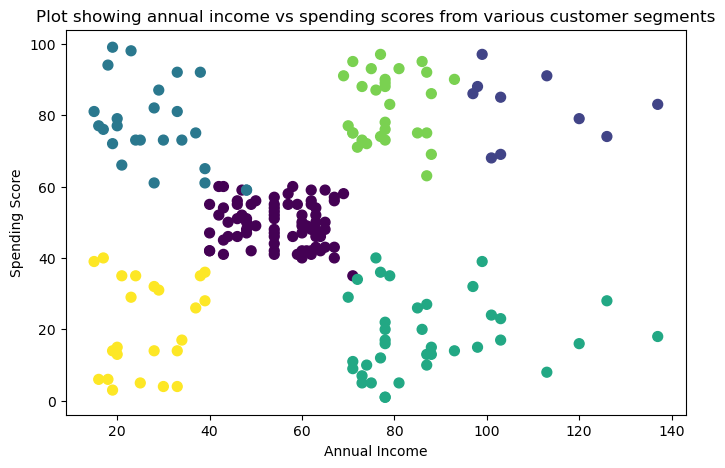

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'], cmap='viridis', s=50)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Plot showing annual income vs spending scores from various customer segments')
plt.grid(False)
plt.show()

In [25]:
x = df.drop('cluster', axis=1)

In [26]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x, df['cluster'], random_state=42)
print(f"silhouette score: {score:.3f}")

silhouette score: 0.415
